In [5]:
2# excludiung Ages with Nans
whole_data = whole_data[~pd.isnull(whole_data['Sex'])]
whole_data.shape

(236703, 492)

In [6]:
new_target = []
for string_target in whole_data['Sex'].values:
  if 'M\nName' in string_target:
    new_target.append(1)
  elif 'F\nName' in string_target:
    new_target.append(0)
  else:
    new_target.append(np.nan)
whole_data['New_sex']= new_target

In [7]:
whole_data[['New_sex','Sex']]

,New_sex,Sex
0,NaN,"132464 NaN\nName: Sex, dtype: object"
1,1.0,"167551 M\nName: Sex, dtype: object"
2,1.0,"201203 M\nName: Sex, dtype: object"
3,0.0,"56297 F\nName: Sex, dtype: object"
4,1.0,"136226 M\nName: Sex, dtype: object"
...,...,...
236698,1.0,"66833 M\nName: Sex, dtype: object"
236699,0.0,"71013 F\nName: Sex, dtype: object"
236700,0.0,"87467 F\nName: Sex, dtype: object"
236701,0.0,"120275 F\nName: Sex, dtype: object"


In [8]:
pd.isnull(whole_data['New_sex']).sum()

12259

In [9]:
whole_data = whole_data[~pd.isnull(whole_data['New_sex'])]
whole_data.head()

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,New_sex
1,1,-860.588226,-94.596062,1.748392e+10,5.468412,406.884354,2.973349,455.105927,238.126282,-510.922325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,-771.608655,246.313766,1.054451e+10,5.639891,569.798054,2.284384,601.678467,308.126190,-357.526186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,3,-918.119244,197.538876,1.041507e+10,5.650920,757.435298,1.774919,477.192200,369.400809,-432.636913,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,-809.137268,336.588287,1.613116e+10,5.824157,562.000023,2.493775,658.329407,330.944854,-337.573971,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
5,5,-485.861942,413.470627,4.357094e+09,5.609188,510.227478,2.041284,776.925476,270.261673,-34.340862,...,-1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [10]:
random_seed = 21202
del whole_data['Unnamed: 0']
whole_data.head()
whole_data = whole_data.sample(frac=1.0, random_state=random_seed)

In [11]:
# finding total number of samples:
n_samples = whole_data.shape[0]
print("number of samples are: {}".format(n_samples))

number of samples are: 224444


In [12]:
# names of all targets:
targets_names = list(whole_data.iloc[:,464:])
print(targets_names)

['index', 'path', 'subject_id', 'study_id', 'dicom_id', 'PerformedProcedureStepDescription', 'ViewPosition', 'ProcedureCodeSequence_CodeMeaning', 'ViewCodeSequence_CodeMeaning', 'Race', 'Ethnicity', 'Sex', 'Age', 'No Finding', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices', 'New_sex']


In [13]:
# finding the number of unique subjects:
unique_subjects = pd.unique(whole_data['subject_id'])
print('The number of unique subjects are: {0}'.format(len(unique_subjects)))

The number of unique subjects are: 60429


In [14]:
# preallocating the frequency of session of the subjects:
# this is written to make sure that we dont use a subject in both training and testing split.
test_split = 0.06       # precent out of total samples
valid_split = 0.1       # precent out of total samples (this is the sumation of both training and validation splits)

n_test = n_samples * test_split
n_whole_train = n_samples - n_test

frequencies = np.ones((unique_subjects.shape[0], 4)) * np.nan
for i, sbj in tqdm(enumerate(unique_subjects)):
  frequencies[i, 0] = sbj
  frequencies[i, 1] = (whole_data['subject_id'] == sbj).sum()
cumolative_sums_of_samples = np.cumsum(frequencies[:,1])
frequencies[:, 2] = cumolative_sums_of_samples
frequencies[:, 3] = cumolative_sums_of_samples/cumolative_sums_of_samples[~0]

60429it [00:27, 2206.41it/s]


In [15]:
# visualizing the frequency  of subjects and images taken from each
vis_frequencies = pd.DataFrame(frequencies,columns=['subject_ID','n_of_sessions/images','cumolative_sessions','preccent_of_number_of_images'])
vis_frequencies.head(15)

,subject_ID,n_of_sessions/images,cumolative_sessions,preccent_of_number_of_images
0,16337794.0,52.0,52.0,0.000232
1,11581121.0,4.0,56.0,0.000250
2,10632213.0,1.0,57.0,0.000254
3,12764286.0,7.0,64.0,0.000285
4,17029048.0,1.0,65.0,0.000290
5,12566705.0,3.0,68.0,0.000303
6,16860825.0,22.0,90.0,0.000401
7,13834529.0,5.0,95.0,0.000423
8,19016834.0,27.0,122.0,0.000544
9,15201268.0,2.0,124.0,0.000552


In [16]:
# separating the testing split without having any mutual_subjects:
testing_subjects_masking = vis_frequencies['preccent_of_number_of_images'] < test_split
testing_subjects = vis_frequencies[testing_subjects_masking]['subject_ID'].values.tolist()
whole_train_subjects = vis_frequencies[~testing_subjects_masking]['subject_ID'].values.tolist()

In [17]:
# excluding irrelevant features
excluding2ds =  np.concatenate( (np.arange(32,41,dtype=int),
                                 np.arange(32,41,dtype=int)+ 116,
                                 np.arange(32,41,dtype=int)+116*2,
                                 np.arange(32,41,dtype=int)+116*3))

whole_data.drop(whole_data.columns[excluding2ds.tolist()],axis = 1,inplace=True)

In [18]:
# separating test_data and whole_trainig_data
Test = whole_data[whole_data['subject_id'].isin(testing_subjects)]
X_test, y_test = Test.iloc[:,:464-36].values, Test['New_sex'].values

# separating test_data and whole_trainig_data
Train = whole_data[whole_data['subject_id'].isin(whole_train_subjects)]

# the size of training/testing_split:
print('The size of the testing split is: {}'.format(Test.shape))
print('The size of the whole trainig (train + valid) split is: {}'.format(Train.shape))

The size of the testing split is: (13409, 456)
The size of the whole trainig (train + valid) split is: (211035, 456)


In [19]:
# splitting the validation split:
X_train, X_val, y_train, y_val = train_test_split(Train.iloc[:,:464-36].values,
                                                  Train['New_sex'].values,
                                                  test_size=valid_split,
                                                  random_state=random_seed
                                                  )

In [20]:
from sklearn.decomposition import PCA

inc = 100
# Create a PCA object
pca = PCA(n_components=5)

# Fit the PCA object to the data
pca.fit_transform(X_train[::inc,:])

# Get the principal components
PCs = pca.components_

# Get the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Print the principal components and their variance explained
for i, PC in enumerate(PCs):
    # print('PC {}: {}'.format(i+1, PC))
    print('   Explained variance: {}'.format(explained_variance[i]))

conv = X_train[::inc,:]@pca.components_.T

   Explained variance: 0.526037350929049
   Explained variance: 0.26756786994389886
   Explained variance: 0.11772687307169856
   Explained variance: 0.08866720233027121
   Explained variance: 6.166209732454149e-07


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a LDA model
model = LinearDiscriminantAnalysis()

# Fit the model to the data
# model.fit(X_train[::inc,:], y_train[::inc])

# Predict the labels of new data
predictions = model.fit_transform(X_train[::inc,:], y_train[::inc])


In [ ]:
predictions.shape

(1900, 1)

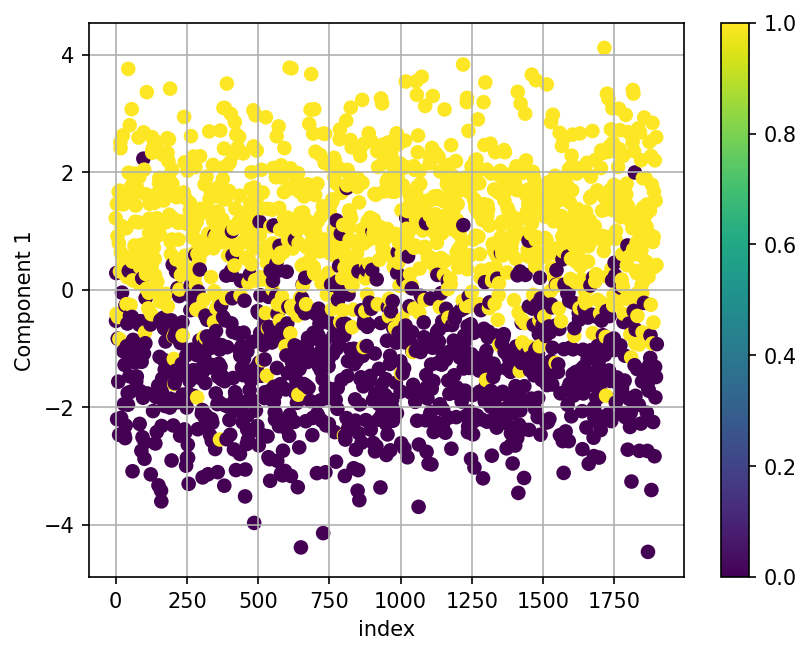

In [23]:
from sklearn.manifold import TSNE
# Load the data
# Create a t-SNE model
tsne = TSNE(n_components=2, perplexity=15,verbose=True,n_iter=2000)
# Fit the model to the data
# tsne_X = tsne.fit_transform(conv)
# Plot the data
plt.figure(dpi=150)
plt.scatter(np.arange(len(predictions)),predictions, c=y_train[::inc])
plt.colorbar()
plt.grid(which='both')
plt.xlabel('index')
plt.ylabel('Component 1')
plt.show()
np.save('/content/gdrive/MyDrive/radiomics/TSNE_MIMIC_sex.npy',{'comp':predictions,'c':y_train[::inc]})